# 📘 EDA Visual: Flujos Migratorios Mixtos hacia Europa (2024)

Este cuaderno muestra un **Análisis Exploratorio de Datos (EDA)** centrado en **visualizaciones básicas** para entender mejor los flujos migratorios hacia Europa.

Dataset: `DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx`  
Hoja: `First_Arrival_Countries_CoO`


## 1. 📂 Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use("ggplot")

# Cargar dataset
df1 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2023_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")
df2 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")


In [ ]:
#Comparamos estructura antes de unir
df1.info()

In [ ]:
df1.head()

In [ ]:
df2.info()

Transformaciones sobre df1 para que coincida con df2

In [ ]:
# Eliminamos las dos primeras filas y establecemos la tercera como encabezado
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2]).reset_index(drop=True)

In [ ]:
df1

In [ ]:
#Creamos las columnas Year y Month a partir de Date
#Primero ajustamos el tipo de dato de la columna Date
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

In [ ]:
#Renombramos columna para que sea idéntica a df2
df1 = df1.rename(columns={'Monthly arrivals': 'Arrivals'})

In [ ]:
# Reordenamos las columnas de df1 para que coincidan con el orden de df2
df1 = df1[['Date', 'Year', 'Month', 'ISO3 - Country of origin', 'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source']]
df1.head()

In [ ]:
#Unimos los dos df
df_arrivals = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df_arrivals

## 2. 👀 Exploración rápida

In [ ]:
# Número de filas y columnas
df_arrivals.shape

In [ ]:
# Nombres de columnas
df_arrivals.columns

In [ ]:
# Tipos de datos
df_arrivals.info()

In [ ]:
# Estadísticas descriptivas
df_arrivals.describe(include="all")

## 3. 📊 Visualización univariada

### 🔹 Top 10 destinos por llegadas

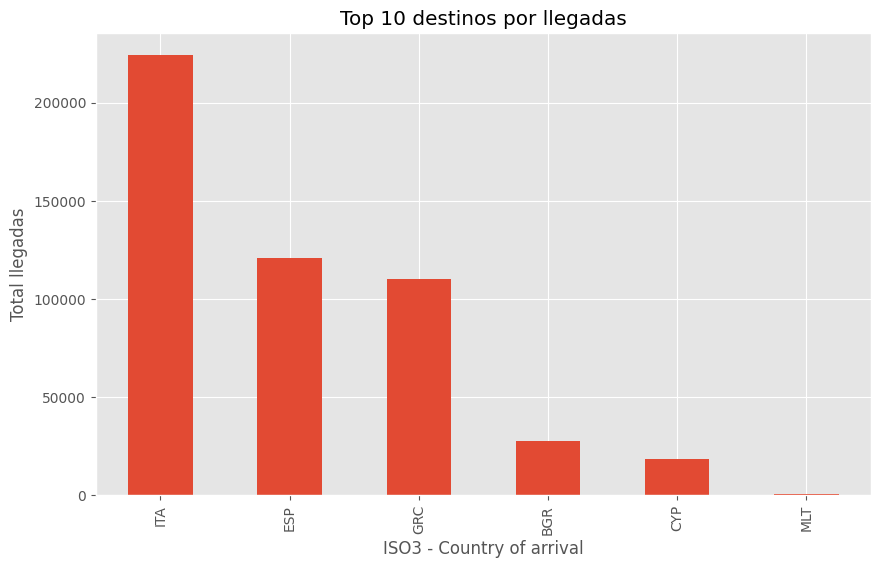

In [102]:
top_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(10)
top_dest.plot(kind='bar', figsize=(10,6), title='Top 10 destinos por llegadas')
plt.ylabel('Total llegadas')
plt.show()

### 🔹 Top 10 países de origen (barras horizontales)

In [ ]:
top_origin = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().sort_values(ascending=False).head(10)
ax = top_origin.plot(
    kind='barh',
    figsize=(10,6),
    title='Top 10 países de origen por llegadas',
    )
plt.ylabel('País de origen')
plt.xlabel('Total llegadas')

# Agregar el valor total sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

### 🔹 Gráfico circular (pie chart)

In [ ]:
top_dest.head(5).plot(
    kind='pie', 
    figsize=(6,6),
    autopct='%1.1f%%',
    title='Llegadas a los 5 principales destinos',
    colormap='Set3')
plt.ylabel('')
plt.show()

## 4. 📈 Visualización temporal

### 🔹 Evolución mensual de llegadas totales

In [ ]:
monthly = df_arrivals.groupby('Month')['Arrivals'].sum()
monthly.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas por mes')
plt.ylabel('Total llegadas')
plt.show()

In [ ]:
#Creamos un df para 20233 y otro para 2024 con la suma de llegadas para utilizarlos en gráficos
monthly_2023 = df_arrivals[df_arrivals['Year'] == 2023].groupby('Month')['Arrivals'].sum()
monthly_2024 = df_arrivals[df_arrivals['Year'] == 2024].groupby('Month')['Arrivals'].sum()


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_2023.index, monthly_2023.values, marker='o', label='2023')
plt.plot(monthly_2024.index, monthly_2024.values, marker='o', label='2024')
plt.title('Llegadas por mes (2023 vs 2024)')
plt.ylabel('Total llegadas')
plt.xlabel('Mes')
plt.legend()
plt.show()

### 🔹 Evolución mensual de llegadas a España (ESP)

In [ ]:
esp = df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ESP'].groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)
esp.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas a España por mes')
plt.ylabel('Llegadas')
plt.xlabel('Mes')
plt.show()

### 🔹 Comparación España vs Italia

In [ ]:
comp = df_arrivals[df_arrivals['ISO3 - Country of arrival'].isin(['ESP','ITA'])].groupby(['Month','ISO3 - Country of arrival'])['Arrivals'].sum().unstack()
comp.plot(kind='line', marker='o', figsize=(10,5), title='Llegadas a ESP vs ITA')
plt.ylabel('Llegadas')
plt.show()

In [ ]:
comp.plot(kind='bar', stacked=False, figsize=(10,5), title='Llegadas a ESP vs ITA')
plt.ylabel('Llegadas')
plt.xlabel('Mes')
plt.show()

### 🔹 Llegadas por trimestre

In [ ]:
df_arrivals['Quarter'] = pd.cut(df_arrivals['Month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])
qsum = df_arrivals.groupby(['Year', 'Quarter'])['Arrivals'].sum().unstack(level=0)
qsum.plot(kind='bar', figsize=(8,5), title='Llegadas por trimestre (2023 vs 2024)')
plt.ylabel('Total llegadas')
plt.xlabel('Trimestre')
plt.legend(title='Año')
plt.show()

## 5. 🔗 Visualización multivariada

### 🔹 Heatmap Origen vs Destino (top 10)

In [ ]:
pivot = df_arrivals.pivot_table(index='ISO3 - Country of origin', columns='ISO3 - Country of arrival',
                       values='Arrivals', aggfunc='sum', fill_value=0)

top_origins = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_destins = pivot.sum(axis=0).sort_values(ascending=False).head(10).index

subset = pivot.loc[top_origins, top_destins]

plt.figure(figsize=(10,8))
sns.heatmap(subset, annot=True, fmt='.0f', cmap='Blues')
plt.title('Heatmap: Origen vs Destino (Top 10)')
plt.show()

### 🔹 Barras apiladas por trimestre y destino

In [ ]:
stacked = df_arrivals.groupby(['Quarter','ISO3 - Country of arrival'])['Arrivals'].sum().unstack().fillna(0)
stacked.head()

stacked.plot(kind='bar', stacked=True, figsize=(12,6), title='Llegadas por trimestre y destino')
plt.ylabel('Total llegadas')
plt.show()

## 6. 🎯 Ejercicios integrados

### 🔹 Top 5 rutas (origen-destino)

In [ ]:
routes = df_arrivals.groupby(['ISO3 - Country of origin','ISO3 - Country of arrival'])['Arrivals'].sum().sort_values(ascending=False).head(5)
routes.plot(kind='bar', figsize=(10,5), title='Top 5 rutas')
plt.ylabel('Total llegadas')
plt.show()

### 🔹 Llegadas a España por mes

In [ ]:
df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ESP'].groupby('Month')['Arrivals'].sum().plot(kind='bar', figsize=(10,5), title='Llegadas a España por mes')
plt.ylabel('Total llegadas')
plt.show()

### 🔹 Top 3 orígenes por destino (ejemplo Italia)

In [ ]:
ita = df_arrivals[df_arrivals['ISO3 - Country of arrival']=='ITA']
top3 = ita.groupby('ISO3 - Country of origin')['Arrivals'].sum().sort_values(ascending=False).head(3)
top3.plot(kind='bar', figsize=(6,4), title='Top 3 orígenes hacia Italia')
plt.ylabel('Total llegadas')
plt.show()

In [ ]:
# Asegurarse de que monthly_2023 y monthly_2024 sean numéricos
monthly_2023 = monthly_2023.astype(float)
monthly_2024 = monthly_2024.astype(float)

# Calcular variación porcentual mes a mes respecto al año anterior
pct_change = ((monthly_2024 - monthly_2023) / monthly_2023) * 100

# Graficar
pct_change.plot(kind='bar', figsize=(10,5), title='Variación porcentual mensual respecto al año anterior')
plt.ylabel('Variación %')
plt.xlabel('Mes')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

## 7. 🏁 Mini proyecto final

Filtrar el segundo semestre (julio–diciembre), agrupar por destino y mostrar los 5 principales con gráfico de barras.

In [ ]:
h2 = df_arrivals[df_arrivals['Month'].between(7,12)]
summary = h2.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(5)
summary.plot(kind='bar', figsize=(8,5), title='Top 5 destinos (Jul-Dic)')
plt.ylabel('Total llegadas')
plt.show()

## ✅ Conclusiones

- Se han visualizado llegadas por destino y origen.
- Se ha explorado la evolución temporal de las llegadas.
- Se han combinado varias variables en heatmaps y gráficos apilados.

Este cuaderno está diseñado para iniciarse en la visualización con Pandas y Matplotlib/Seaborn.